In [ ]:
import pandas as pd
import numpy as np
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
student_id = '' # fill with your student ID

assert student_id != 'your_student_id', 'Please fill in your student_id before you start.'

In [ ]:
# Path name for dataset
train_path = 'train_covid.csv'
test_path = 'test_covid.csv'

# Download the data according to the student ID
if(int(student_id[-1:])%3 == 0):
  !gdown --id '14IlMk8Ic5TbTsNpLk66RExqDFJiHhFS6' --output train_covid.csv
  !gdown --id '140e9SHYMI84luoUKxEgO_eMEsLmfseNj' --output test_covid.csv

if(int(student_id[-1:])%3 == 1):
  !gdown --id '1DeTgJjzV2LXl_PD45l_q44915yVAVw_v' --output train_covid.csv
  !gdown --id '1iUQB1WUSz5xbaXo9-Z3a14NMCMc8Y4aI' --output test_covid.csv

if(int(student_id[-1:])%3 == 2):
  !gdown --id '1XEehyTDsAiCo_dy8ASSvcx1pLzE534p2' --output train_covid.csv
  !gdown --id '1OCTXYjjXeTW7GOQP4-am3zOmjcAJH_-p' --output test_covid.csv

Downloading...
From: https://drive.google.com/uc?id=1XEehyTDsAiCo_dy8ASSvcx1pLzE534p2
To: /content/train_covid.csv
100% 3.30M/3.30M [00:00<00:00, 106MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OCTXYjjXeTW7GOQP4-am3zOmjcAJH_-p
To: /content/test_covid.csv
100% 589k/589k [00:00<00:00, 84.1MB/s]


In [ ]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

x = train
x.columns[x.isnull().sum()>0]
y = train.test_condition



train.drop(['date','pct_cmnty_cli','pct_worried_finances', 'mean_hh_cli_ct','mean_cmnty_cli_ct'], axis=1, inplace = True)
test.drop(['date','pct_cmnty_cli', 'pct_worried_finances', 'mean_hh_cli_ct',
       'mean_cmnty_cli_ct'], axis = 1, inplace = True)
train
#train.drop(['date','pct_cmnty_cli', 'pct_worried_finances'], axis = 1, inplace = True)
#test.drop(['date','pct_cmnty_cli', 'pct_worried_finances'], axis = 1, inplace = True)

,state_code,gender,age_bucket,n,weight_sums,pct_cli,pct_ili,pct_cli_anosmia_ageusia,pct_hh_cli,pct_hh_fever,pct_hh_sore_throat,pct_hh_cough,pct_hh_shortness_of_breath,pct_hh_difficulty_breathing,pct_self_fever,pct_self_cough,pct_self_shortness_of_breath,pct_self_difficulty_breathing,pct_self_tiredness_or_exhaustion,pct_self_nasal_congestion,pct_self_runny_nose,pct_self_muscle_joint_aches,pct_self_sore_throat,pct_self_persistent_pain_pressure_in_chest,pct_self_nausea_vomiting,pct_self_diarrhea,pct_self_anosmia_ageusia,pct_self_other,pct_self_none_of_above,pct_self_multiple_symptoms,pct_worked_outside_home,pct_avoid_contact_all_or_most_time,mean_outside_hh_contact_at_work_ct,mean_outside_hh_contact_shopping_ct,mean_outside_hh_contact_in_social_gatherings_ct,pct_contact_covid_positive,pct_diabetes,pct_cancer,pct_heart_disease,pct_high_blood_pressure,...,pct_hh_fever_weighted,pct_hh_sore_throat_weighted,pct_hh_cough_weighted,pct_hh_shortness_of_breath_weighted,pct_hh_difficulty_breathing_weighted,mean_hh_cli_ct_weighted,mean_cmnty_cli_ct_weighted,pct_self_fever_weighted,pct_self_cough_weighted,pct_self_shortness_of_breath_weighted,pct_self_difficulty_breathing_weighted,pct_self_tiredness_or_exhaustion_weighted,pct_self_nasal_congestion_weighted,pct_self_runny_nose_weighted,pct_self_muscle_joint_aches_weighted,pct_self_sore_throat_weighted,pct_self_persistent_pain_pressure_in_chest_weighted,pct_self_nausea_vomiting_weighted,pct_self_diarrhea_weighted,pct_self_anosmia_ageusia_weighted,pct_self_other_weighted,pct_self_none_of_above_weighted,pct_self_multiple_symptoms_weighted,pct_worked_outside_home_weighted,pct_avoid_contact_all_or_most_time_weighted,mean_outside_hh_contact_at_work_ct_weighted,mean_outside_hh_contact_shopping_ct_weighted,mean_outside_hh_contact_in_social_gatherings_ct_weighted,pct_contact_covid_positive_weighted,pct_diabetes_weighted,pct_cancer_weighted,pct_heart_disease_weighted,pct_high_blood_pressure_weighted,pct_asthma_weighted,pct_chronic_lung_disease_weighted,pct_kidney_disease_weighted,pct_autoimmune_disorder_weighted,pct_no_above_medical_conditions_weighted,pct_multiple_medical_conditions_weighted,test_condition
0,az,female,35-54,691,7.178188e+05,1.9432,2.0927,3.7369,3.0435,3.6232,14.6589,25.3623,9.4340,4.9347,2.6906,21.2257,8.0717,4.9327,22.2720,23.1689,22.5710,14.6487,13.0045,4.6338,5.8296,11.3602,2.2422,7.1749,44.8430,36.0347,33.1884,86.0870,6.6443,4.7101,0.8734,0.2903,6.1224,4.5190,2.7697,19.6793,...,3.7761,14.2254,25.1809,8.8836,4.5804,0.0000,0.0000,2.2870,19.9354,7.5341,3.8551,22.1217,22.4062,23.6130,14.6815,11.7781,3.7431,5.8567,9.7790,2.4054,5.7952,44.9709,35.6750,36.7339,84.9859,6.3221,3.9151,0.9310,0.2187,6.9885,4.8782,2.8226,20.9894,18.2209,3.6390,1.2656,12.4720,53.3755,16.5559,0
1,fl,female,35-54,594,2.440767e+06,1.1945,1.0239,2.5597,1.6835,2.1886,11.9529,21.2121,7.2513,3.0405,1.5358,17.2355,5.6314,2.3891,17.9181,18.4300,13.1399,11.6041,10.4096,2.9010,3.7543,6.6553,1.8771,3.9249,56.9966,28.4512,37.4368,85.5219,7.3309,5.8821,0.3571,1.1824,7.1307,4.0747,3.2258,19.3548,...,2.2615,11.0611,22.6283,9.2339,3.9501,0.0000,0.0000,1.6943,17.9622,7.3437,3.1849,16.8368,18.1706,14.2135,12.6452,10.0089,3.0221,4.6270,6.4280,3.0217,3.3207,58.3008,28.0152,36.7453,86.0684,5.2589,4.7925,0.1937,1.2643,8.9227,3.5595,4.5854,22.2428,15.5840,3.6722,2.5126,11.2069,56.8991,17.8140,0
2,ia,male,55+,98,3.051519e+05,0.0000,0.0000,3.1915,1.0204,1.0204,8.1633,15.3061,10.3093,4.0816,0.0000,12.7660,8.5106,2.1277,12.7660,8.5106,10.6383,9.5745,7.4468,2.1277,1.0638,3.1915,3.1915,1.0638,72.3404,14.2857,30.6122,84.6939,1.1562,2.4800,0.4921,0.0000,19.3878,9.1837,16.3265,60.2041,...,1.5940,8.3409,17.5673,10.1811,4.5716,0.0000,0.0000,0.0000,13.5974,7.8752,2.0133,11.9265,8.9418,12.0471,8.9795,8.0382,2.4405,1.0328,3.0709,3.1115,0.9351,69.2378,15.4580,27.9746,86.4107,0.5916,1.8156,0.2189,0.0000,20.2359,8.3652,17.2087,63.3270,8.4448,7.6395,11.3939,4.4325,19.2190,38.0735,1
3,in,female,18-34,759,6.789525e+05,1.9920,1.7264,3.3201,3.4256,3.6891,1

In [ ]:
train

,state_code,gender,age_bucket,n,weight_sums,pct_cli,pct_ili,pct_cli_anosmia_ageusia,pct_hh_cli,pct_hh_fever,pct_hh_sore_throat,pct_hh_cough,pct_hh_shortness_of_breath,pct_hh_difficulty_breathing,pct_self_fever,pct_self_cough,pct_self_shortness_of_breath,pct_self_difficulty_breathing,pct_self_tiredness_or_exhaustion,pct_self_nasal_congestion,pct_self_runny_nose,pct_self_muscle_joint_aches,pct_self_sore_throat,pct_self_persistent_pain_pressure_in_chest,pct_self_nausea_vomiting,pct_self_diarrhea,pct_self_anosmia_ageusia,pct_self_other,pct_self_none_of_above,pct_self_multiple_symptoms,pct_worked_outside_home,pct_avoid_contact_all_or_most_time,mean_outside_hh_contact_at_work_ct,mean_outside_hh_contact_shopping_ct,mean_outside_hh_contact_in_social_gatherings_ct,pct_contact_covid_positive,pct_diabetes,pct_cancer,pct_heart_disease,pct_high_blood_pressure,...,pct_hh_fever_weighted,pct_hh_sore_throat_weighted,pct_hh_cough_weighted,pct_hh_shortness_of_breath_weighted,pct_hh_difficulty_breathing_weighted,mean_hh_cli_ct_weighted,mean_cmnty_cli_ct_weighted,pct_self_fever_weighted,pct_self_cough_weighted,pct_self_shortness_of_breath_weighted,pct_self_difficulty_breathing_weighted,pct_self_tiredness_or_exhaustion_weighted,pct_self_nasal_congestion_weighted,pct_self_runny_nose_weighted,pct_self_muscle_joint_aches_weighted,pct_self_sore_throat_weighted,pct_self_persistent_pain_pressure_in_chest_weighted,pct_self_nausea_vomiting_weighted,pct_self_diarrhea_weighted,pct_self_anosmia_ageusia_weighted,pct_self_other_weighted,pct_self_none_of_above_weighted,pct_self_multiple_symptoms_weighted,pct_worked_outside_home_weighted,pct_avoid_contact_all_or_most_time_weighted,mean_outside_hh_contact_at_work_ct_weighted,mean_outside_hh_contact_shopping_ct_weighted,mean_outside_hh_contact_in_social_gatherings_ct_weighted,pct_contact_covid_positive_weighted,pct_diabetes_weighted,pct_cancer_weighted,pct_heart_disease_weighted,pct_high_blood_pressure_weighted,pct_asthma_weighted,pct_chronic_lung_disease_weighted,pct_kidney_disease_weighted,pct_autoimmune_disorder_weighted,pct_no_above_medical_conditions_weighted,pct_multiple_medical_conditions_weighted,test_condition
0,az,female,35-54,691,7.178188e+05,1.9432,2.0927,3.7369,3.0435,3.6232,14.6589,25.3623,9.4340,4.9347,2.6906,21.2257,8.0717,4.9327,22.2720,23.1689,22.5710,14.6487,13.0045,4.6338,5.8296,11.3602,2.2422,7.1749,44.8430,36.0347,33.1884,86.0870,6.6443,4.7101,0.8734,0.2903,6.1224,4.5190,2.7697,19.6793,...,3.7761,14.2254,25.1809,8.8836,4.5804,0.0000,0.0000,2.2870,19.9354,7.5341,3.8551,22.1217,22.4062,23.6130,14.6815,11.7781,3.7431,5.8567,9.7790,2.4054,5.7952,44.9709,35.6750,36.7339,84.9859,6.3221,3.9151,0.9310,0.2187,6.9885,4.8782,2.8226,20.9894,18.2209,3.6390,1.2656,12.4720,53.3755,16.5559,0
1,fl,female,35-54,594,2.440767e+06,1.1945,1.0239,2.5597,1.6835,2.1886,11.9529,21.2121,7.2513,3.0405,1.5358,17.2355,5.6314,2.3891,17.9181,18.4300,13.1399,11.6041,10.4096,2.9010,3.7543,6.6553,1.8771,3.9249,56.9966,28.4512,37.4368,85.5219,7.3309,5.8821,0.3571,1.1824,7.1307,4.0747,3.2258,19.3548,...,2.2615,11.0611,22.6283,9.2339,3.9501,0.0000,0.0000,1.6943,17.9622,7.3437,3.1849,16.8368,18.1706,14.2135,12.6452,10.0089,3.0221,4.6270,6.4280,3.0217,3.3207,58.3008,28.0152,36.7453,86.0684,5.2589,4.7925,0.1937,1.2643,8.9227,3.5595,4.5854,22.2428,15.5840,3.6722,2.5126,11.2069,56.8991,17.8140,0
2,ia,male,55+,98,3.051519e+05,0.0000,0.0000,3.1915,1.0204,1.0204,8.1633,15.3061,10.3093,4.0816,0.0000,12.7660,8.5106,2.1277,12.7660,8.5106,10.6383,9.5745,7.4468,2.1277,1.0638,3.1915,3.1915,1.0638,72.3404,14.2857,30.6122,84.6939,1.1562,2.4800,0.4921,0.0000,19.3878,9.1837,16.3265,60.2041,...,1.5940,8.3409,17.5673,10.1811,4.5716,0.0000,0.0000,0.0000,13.5974,7.8752,2.0133,11.9265,8.9418,12.0471,8.9795,8.0382,2.4405,1.0328,3.0709,3.1115,0.9351,69.2378,15.4580,27.9746,86.4107,0.5916,1.8156,0.2189,0.0000,20.2359,8.3652,17.2087,63.3270,8.4448,7.6395,11.3939,4.4325,19.2190,38.0735,1
3,in,female,18-34,759,6.789525e+05,1.9920,1.7264,3.3201,3.4256,3.6891,1

In [ ]:
train['pct_worried_finances_weighted'].unique()

array([0])

In [ ]:
train['state_code'].unique()

array(['az', 'fl', 'ia', 'in', 'la', 'mo', 'nj', 'nm', 'nv', 'ny', 'pa',
       'va', 'al', 'ar', 'ca', 'ct', 'il', 'ky', 'ma', 'mi', 'mn', 'ms',
       'mt', 'nc', 'nh', 'oh', 'ri', 'sc', 'sd', 'tx', 'ut', 'wi', 'co',
       'ga', 'id', 'ks', 'md', 'ne', 'ok', 'or', 'ak', 'de', 'wa', 'tn',
       'hi', 'nd', 'me', 'wv', 'vt'], dtype=object)

In [ ]:
train

,state_code,gender,age_bucket,n,weight_sums,pct_cli,pct_ili,pct_cli_anosmia_ageusia,pct_hh_cli,pct_hh_fever,pct_hh_sore_throat,pct_hh_cough,pct_hh_shortness_of_breath,pct_hh_difficulty_breathing,pct_self_fever,pct_self_cough,pct_self_shortness_of_breath,pct_self_difficulty_breathing,pct_self_tiredness_or_exhaustion,pct_self_nasal_congestion,pct_self_runny_nose,pct_self_muscle_joint_aches,pct_self_sore_throat,pct_self_persistent_pain_pressure_in_chest,pct_self_nausea_vomiting,pct_self_diarrhea,pct_self_anosmia_ageusia,pct_self_other,pct_self_none_of_above,pct_self_multiple_symptoms,pct_worked_outside_home,pct_avoid_contact_all_or_most_time,mean_outside_hh_contact_at_work_ct,mean_outside_hh_contact_shopping_ct,mean_outside_hh_contact_in_social_gatherings_ct,pct_contact_covid_positive,pct_diabetes,pct_cancer,pct_heart_disease,pct_high_blood_pressure,...,pct_hh_fever_weighted,pct_hh_sore_throat_weighted,pct_hh_cough_weighted,pct_hh_shortness_of_breath_weighted,pct_hh_difficulty_breathing_weighted,mean_hh_cli_ct_weighted,mean_cmnty_cli_ct_weighted,pct_self_fever_weighted,pct_self_cough_weighted,pct_self_shortness_of_breath_weighted,pct_self_difficulty_breathing_weighted,pct_self_tiredness_or_exhaustion_weighted,pct_self_nasal_congestion_weighted,pct_self_runny_nose_weighted,pct_self_muscle_joint_aches_weighted,pct_self_sore_throat_weighted,pct_self_persistent_pain_pressure_in_chest_weighted,pct_self_nausea_vomiting_weighted,pct_self_diarrhea_weighted,pct_self_anosmia_ageusia_weighted,pct_self_other_weighted,pct_self_none_of_above_weighted,pct_self_multiple_symptoms_weighted,pct_worked_outside_home_weighted,pct_avoid_contact_all_or_most_time_weighted,mean_outside_hh_contact_at_work_ct_weighted,mean_outside_hh_contact_shopping_ct_weighted,mean_outside_hh_contact_in_social_gatherings_ct_weighted,pct_contact_covid_positive_weighted,pct_diabetes_weighted,pct_cancer_weighted,pct_heart_disease_weighted,pct_high_blood_pressure_weighted,pct_asthma_weighted,pct_chronic_lung_disease_weighted,pct_kidney_disease_weighted,pct_autoimmune_disorder_weighted,pct_no_above_medical_conditions_weighted,pct_multiple_medical_conditions_weighted,test_condition
0,az,female,35-54,691,7.178188e+05,1.9432,2.0927,3.7369,3.0435,3.6232,14.6589,25.3623,9.4340,4.9347,2.6906,21.2257,8.0717,4.9327,22.2720,23.1689,22.5710,14.6487,13.0045,4.6338,5.8296,11.3602,2.2422,7.1749,44.8430,36.0347,33.1884,86.0870,6.6443,4.7101,0.8734,0.2903,6.1224,4.5190,2.7697,19.6793,...,3.7761,14.2254,25.1809,8.8836,4.5804,0.0000,0.0000,2.2870,19.9354,7.5341,3.8551,22.1217,22.4062,23.6130,14.6815,11.7781,3.7431,5.8567,9.7790,2.4054,5.7952,44.9709,35.6750,36.7339,84.9859,6.3221,3.9151,0.9310,0.2187,6.9885,4.8782,2.8226,20.9894,18.2209,3.6390,1.2656,12.4720,53.3755,16.5559,0
1,fl,female,35-54,594,2.440767e+06,1.1945,1.0239,2.5597,1.6835,2.1886,11.9529,21.2121,7.2513,3.0405,1.5358,17.2355,5.6314,2.3891,17.9181,18.4300,13.1399,11.6041,10.4096,2.9010,3.7543,6.6553,1.8771,3.9249,56.9966,28.4512,37.4368,85.5219,7.3309,5.8821,0.3571,1.1824,7.1307,4.0747,3.2258,19.3548,...,2.2615,11.0611,22.6283,9.2339,3.9501,0.0000,0.0000,1.6943,17.9622,7.3437,3.1849,16.8368,18.1706,14.2135,12.6452,10.0089,3.0221,4.6270,6.4280,3.0217,3.3207,58.3008,28.0152,36.7453,86.0684,5.2589,4.7925,0.1937,1.2643,8.9227,3.5595,4.5854,22.2428,15.5840,3.6722,2.5126,11.2069,56.8991,17.8140,0
2,ia,male,55+,98,3.051519e+05,0.0000,0.0000,3.1915,1.0204,1.0204,8.1633,15.3061,10.3093,4.0816,0.0000,12.7660,8.5106,2.1277,12.7660,8.5106,10.6383,9.5745,7.4468,2.1277,1.0638,3.1915,3.1915,1.0638,72.3404,14.2857,30.6122,84.6939,1.1562,2.4800,0.4921,0.0000,19.3878,9.1837,16.3265,60.2041,...,1.5940,8.3409,17.5673,10.1811,4.5716,0.0000,0.0000,0.0000,13.5974,7.8752,2.0133,11.9265,8.9418,12.0471,8.9795,8.0382,2.4405,1.0328,3.0709,3.1115,0.9351,69.2378,15.4580,27.9746,86.4107,0.5916,1.8156,0.2189,0.0000,20.2359,8.3652,17.2087,63.3270,8.4448,7.6395,11.3939,4.4325,19.2190,38.0735,1
3,in,female,18-34,759,6.789525e+05,1.9920,1.7264,3.3201,3.4256,3.6891,1

In [ ]:
train.drop(['pct_worried_finances_weighted', 'state_code','weight_sums','n'], axis=1, inplace = True)
test.drop(['pct_worried_finances_weighted', 'state_code','weight_sums','n'], axis=1, inplace = True)

In [ ]:
train = train[train.columns.drop(list(train.filter(regex='weighted')))]
test = test[test.columns.drop(list(test.filter(regex='weighted')))]

In [ ]:
train

,gender,age_bucket,pct_cli,pct_ili,pct_cli_anosmia_ageusia,pct_hh_cli,pct_hh_fever,pct_hh_sore_throat,pct_hh_cough,pct_hh_shortness_of_breath,pct_hh_difficulty_breathing,pct_self_fever,pct_self_cough,pct_self_shortness_of_breath,pct_self_difficulty_breathing,pct_self_tiredness_or_exhaustion,pct_self_nasal_congestion,pct_self_runny_nose,pct_self_muscle_joint_aches,pct_self_sore_throat,pct_self_persistent_pain_pressure_in_chest,pct_self_nausea_vomiting,pct_self_diarrhea,pct_self_anosmia_ageusia,pct_self_other,pct_self_none_of_above,pct_self_multiple_symptoms,pct_worked_outside_home,pct_avoid_contact_all_or_most_time,mean_outside_hh_contact_at_work_ct,mean_outside_hh_contact_shopping_ct,mean_outside_hh_contact_in_social_gatherings_ct,pct_contact_covid_positive,pct_diabetes,pct_cancer,pct_heart_disease,pct_high_blood_pressure,pct_asthma,pct_chronic_lung_disease,pct_kidney_disease,pct_autoimmune_disorder,pct_no_above_medical_conditions,pct_multiple_medical_conditions,test_condition
0,female,35-54,1.9432,2.0927,3.7369,3.0435,3.6232,14.6589,25.3623,9.4340,4.9347,2.6906,21.2257,8.0717,4.9327,22.2720,23.1689,22.5710,14.6487,13.0045,4.6338,5.8296,11.3602,2.2422,7.1749,44.8430,36.0347,33.1884,86.0870,6.6443,4.7101,0.8734,0.2903,6.1224,4.5190,2.7697,19.6793,20.2624,3.0612,1.0204,13.2653,53.0612,16.6181,0
1,female,35-54,1.1945,1.0239,2.5597,1.6835,2.1886,11.9529,21.2121,7.2513,3.0405,1.5358,17.2355,5.6314,2.3891,17.9181,18.4300,13.1399,11.6041,10.4096,2.9010,3.7543,6.6553,1.8771,3.9249,56.9966,28.4512,37.4368,85.5219,7.3309,5.8821,0.3571,1.1824,7.1307,4.0747,3.2258,19.3548,15.4499,1.8676,1.3582,10.3565,58.7436,14.4312,0
2,male,55+,0.0000,0.0000,3.1915,1.0204,1.0204,8.1633,15.3061,10.3093,4.0816,0.0000,12.7660,8.5106,2.1277,12.7660,8.5106,10.6383,9.5745,7.4468,2.1277,1.0638,3.1915,3.1915,1.0638,72.3404,14.2857,30.6122,84.6939,1.1562,2.4800,0.4921,0.0000,19.3878,9.1837,16.3265,60.2041,9.1837,8.1633,9.1837,6.1224,18.3673,36.7347,1
3,female,18-34,1.9920,1.7264,3.3201,3.4256,3.6891,16.7546,25.9894,9.0909,3.8259,2.7888,20.5843,6.1089,3.0544,24.4356,17.6627,19.3891,14.0770,14.4754,3.3201,5.4449,9.9602,1.5936,3.0544,46.8792,36.2319,38.0449,81.8182,6.8648,3.8267,0.6512,1.5852,3.0423,0.6614,0.3968,9.9206,18.1217,0.3968,1.1905,4.8942,68.2540,5.6878,0
4,female,55+,0.2309,0.2309,1.6166,0.4577,0.9153,5.0228,17.1233,3.6530,1.3699,0.4619,15.9353,3.9261,1.1547,9.9307,16.1663,15.0115,13.8568,5.0808,1.1547,2.0785,5.5427,1.3857,5.7737,57.9677,26.0274,21.6590,92.2374,2.2346,1.7955,0.1250,0.6897,18.0556,11.8056,7.8704,48.6111,12.0370,10.4167,3.7037,11.8056,31.0185,34.4907,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,male,18-34,0.5076,0.5076,1.0152,1.0000,1.0000,6.0000,11.8812,4.4554,2.5000,0.5076,10.1523,2.0305,2.0305,12.6904,11.6751,8.6294,7.6142,6.5990,1.5228,2.5381,4.5685,1.0152,1.5228,69.0355,17.3267,71.7822,39.8010,23.6313,17.5818,7.3659,2.9703,2.0101,0.0000,1.5075,16.5829,16.5829,0.0000,1.0050,2.0101,68.3417,7.5377,0
4996,female,55+,0.0000,0.0000,0.8368,0.4149,0.4149,6.2241,14.1079,5.8091,3.3195,0.0000,11.7155,4.6025,2.5105,12.1339,12.5523,11.7155,13.3891,5.8577,1.2552,2.9289,2.9289,0.8368,3.7657,66.9456,20.7469,23.6515,59.7510,3.9745,4.3642,2.7914,0.4149,19.6653,12.1339,8.7866,41.4226,21.7573,6.6946,2.0921,10.4603,30.9623,34.7280,0
4997,male,18-34,0.0000,0.0000,2.5641,0.0000,0.0000,1.2500,7.5000,1.2500,1.2500,0.0000,2.5641,2.5641,1.2821,20.5128,19.2308,8.9744,6.4103,0.0000,2.5641,3.8462,8.9744,2.5641,1.2821,62.8205,21.2500,65.0000,27.5000,72.6528,57.3662,15.1892,3.7500,2.5316,0.0000,0.0000,5.0633,8.8608,0.0000,0.0000,1.2658,86.0759,3.7975,1
4998,male,55+,0.0000,0.0000,0.7353,0.0000,0.0000,0.7299,6.5693,3.6496,1.4599,0.0000,4.4118,2.9412,0.7353,8.8235,11.7647,9.5588,8.8235,1.4706,0.7353,0.0000,3.6765,0.7353,2.2059,69.8529,16.0584,33.5766,55.4745,15.4457,5.9333,2.5347,0.7299,22.0588,8.0882,14.7059,55.8824,5.8824,7.35

In [ ]:
test

,gender,age_bucket,pct_cli,pct_ili,pct_cli_anosmia_ageusia,pct_hh_cli,pct_hh_fever,pct_hh_sore_throat,pct_hh_cough,pct_hh_shortness_of_breath,pct_hh_difficulty_breathing,pct_self_fever,pct_self_cough,pct_self_shortness_of_breath,pct_self_difficulty_breathing,pct_self_tiredness_or_exhaustion,pct_self_nasal_congestion,pct_self_runny_nose,pct_self_muscle_joint_aches,pct_self_sore_throat,pct_self_persistent_pain_pressure_in_chest,pct_self_nausea_vomiting,pct_self_diarrhea,pct_self_anosmia_ageusia,pct_self_other,pct_self_none_of_above,pct_self_multiple_symptoms,pct_worked_outside_home,pct_avoid_contact_all_or_most_time,mean_outside_hh_contact_at_work_ct,mean_outside_hh_contact_shopping_ct,mean_outside_hh_contact_in_social_gatherings_ct,pct_contact_covid_positive,pct_diabetes,pct_cancer,pct_heart_disease,pct_high_blood_pressure,pct_asthma,pct_chronic_lung_disease,pct_kidney_disease,pct_autoimmune_disorder,pct_no_above_medical_conditions,pct_multiple_medical_conditions
0,female,35-54,2.0979,2.0979,5.5944,3.5461,4.2553,15.4930,23.2394,10.7914,6.4286,2.0979,19.5804,6.9930,2.7972,20.2797,16.7832,11.8881,17.4825,13.2867,5.5944,6.2937,6.9930,4.8951,4.8951,58.0420,30.0699,54.5455,45.4545,10.0818,8.9381,2.5566,7.0423,15.4930,2.8169,2.8169,34.5070,14.0845,5.6338,0.7042,7.0423,49.2958,19.0141
1,female,55+,0.0000,0.0000,2.1277,0.0000,0.7092,4.9645,9.2199,6.3380,3.5211,0.0000,6.3830,6.3830,3.5461,10.6383,8.5106,8.5106,12.0567,2.1277,2.1277,1.4184,3.5461,2.1277,3.5461,70.9220,16.9014,21.8310,57.0423,8.4000,7.1300,3.1789,3.5211,24.1135,7.8014,11.3475,60.2837,17.7305,11.3475,2.8369,11.3475,23.4043,38.2979
2,male,35-54,3.1250,3.1250,3.1250,3.0769,3.0769,4.6875,10.7692,4.6154,3.0769,3.1250,6.2500,6.2500,0.0000,14.0625,10.9375,10.9375,12.5000,6.2500,3.1250,1.5625,6.2500,0.0000,1.5625,71.8750,21.5385,83.0769,28.1250,16.1525,12.9310,11.6111,6.2500,9.2308,0.0000,3.0769,33.8462,7.6923,0.0000,0.0000,4.6154,56.9231,12.3077
3,male,55+,1.3699,1.3699,4.1096,0.0000,0.0000,5.4054,9.4595,2.7027,2.7027,1.3699,10.9589,2.7397,4.1096,12.3288,15.0685,10.9589,16.4384,4.1096,2.7397,1.3699,2.7397,4.1096,0.0000,63.0137,22.9730,37.8378,50.6849,3.1633,8.3051,5.1897,4.1096,30.1370,9.5890,28.7671,58.9041,8.2192,12.3288,5.4795,8.2192,21.9178,49.3151
4,female,18-34,0.0000,0.0000,2.0408,2.0619,2.0619,10.2041,9.2784,4.1237,2.0619,0.0000,7.1429,3.0612,1.0204,18.3673,11.2245,10.2041,10.2041,6.1224,1.0204,4.0816,6.1224,2.0408,1.0204,66.3265,22.4490,52.0408,46.9388,9.2051,6.3571,3.2771,4.1237,2.1053,1.0526,0.0000,9.4737,15.7895,1.0526,1.0526,5.2632,70.5263,5.2632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,female,55+,0.7728,0.7728,1.2365,1.5432,2.0062,5.0926,11.8827,5.4096,3.7094,0.9274,10.0464,4.1731,2.3184,11.1283,10.9737,7.7280,10.5100,3.4003,1.2365,2.1638,3.4003,0.6182,3.7094,69.5518,18.0982,27.2277,59.4059,4.7654,6.1153,6.3159,2.0000,6.0278,11.1283,11.1283,50.2318,15.1468,6.6461,4.4822,11.1283,29.9845,43.5858
902,male,18-34,0.0000,0.6024,1.8072,0.5848,0.5848,5.8480,14.6199,4.0936,2.9240,0.6024,10.2410,3.6145,1.8072,15.6627,10.8434,10.8434,7.2289,3.0120,3.0120,4.2169,6.6265,1.8072,0.0000,66.8675,19.8830,68.1818,34.8485,9.3906,16.3465,4.8321,2.9240,0.5988,0.5988,0.5988,11.3772,11.3772,0.0000,0.0000,2.9940,75.4491,5.3892
903,male,35-54,0.0000,0.0000,0.5348,0.5277,0.7916,6.3325,11.8734,2.3747,1.5831,0.0000,7.7540,1.3369,1.3369,9.3583,9.3583,5.0802,7.4866,5.3476,1.6043,0.8021,4.0107,0.5348,1.6043,75.6684,12.9288,65.7895,39.7351,682617.6758,19.1957,35218.7570,2.6385,4.7745,2.3873,2.6525,30.5040,7.6923,1.0610,1.0610,3.7135,56.4987,16.9761
904,female,18-34,0.0000,0.0000,3.3708,1.1111,1.1236,19.7802,14.4444,4.4444,2.2222,0.0000,12.3596,4.4944,4.4944,31.4607,15.7303,21.3483,19.1011,14.6067,4.4944,4.4944,5.6180,3.3708,3.3708,48.3146,31.8681,50.0000,28.5714,8.6575,9.7143,4.2237,0.0000,0.0000,0.0000,0.0000,3.3333,28.8889,0.0000,0.0000,11.1111,62.2222,12.222

In [ ]:
train.dtypes

In [ ]:
X = train.drop('test_condition', axis=1).copy()
X.head()

,gender,age_bucket,pct_cli,pct_ili,pct_cli_anosmia_ageusia,pct_hh_cli,pct_hh_fever,pct_hh_sore_throat,pct_hh_cough,pct_hh_shortness_of_breath,pct_hh_difficulty_breathing,pct_self_fever,pct_self_cough,pct_self_shortness_of_breath,pct_self_difficulty_breathing,pct_self_tiredness_or_exhaustion,pct_self_nasal_congestion,pct_self_runny_nose,pct_self_muscle_joint_aches,pct_self_sore_throat,pct_self_persistent_pain_pressure_in_chest,pct_self_nausea_vomiting,pct_self_diarrhea,pct_self_anosmia_ageusia,pct_self_other,pct_self_none_of_above,pct_self_multiple_symptoms,pct_worked_outside_home,pct_avoid_contact_all_or_most_time,mean_outside_hh_contact_at_work_ct,mean_outside_hh_contact_shopping_ct,mean_outside_hh_contact_in_social_gatherings_ct,pct_contact_covid_positive,pct_diabetes,pct_cancer,pct_heart_disease,pct_high_blood_pressure,pct_asthma,pct_chronic_lung_disease,pct_kidney_disease,pct_autoimmune_disorder,pct_no_above_medical_conditions,pct_multiple_medical_conditions
0,female,35-54,1.9432,2.0927,3.7369,3.0435,3.6232,14.6589,25.3623,9.4340,4.9347,2.6906,21.2257,8.0717,4.9327,22.2720,23.1689,22.5710,14.6487,13.0045,4.6338,5.8296,11.3602,2.2422,7.1749,44.8430,36.0347,33.1884,86.0870,6.6443,4.7101,0.8734,0.2903,6.1224,4.5190,2.7697,19.6793,20.2624,3.0612,1.0204,13.2653,53.0612,16.6181
1,female,35-54,1.1945,1.0239,2.5597,1.6835,2.1886,11.9529,21.2121,7.2513,3.0405,1.5358,17.2355,5.6314,2.3891,17.9181,18.4300,13.1399,11.6041,10.4096,2.9010,3.7543,6.6553,1.8771,3.9249,56.9966,28.4512,37.4368,85.5219,7.3309,5.8821,0.3571,1.1824,7.1307,4.0747,3.2258,19.3548,15.4499,1.8676,1.3582,10.3565,58.7436,14.4312
2,male,55+,0.0000,0.0000,3.1915,1.0204,1.0204,8.1633,15.3061,10.3093,4.0816,0.0000,12.7660,8.5106,2.1277,12.7660,8.5106,10.6383,9.5745,7.4468,2.1277,1.0638,3.1915,3.1915,1.0638,72.3404,14.2857,30.6122,84.6939,1.1562,2.4800,0.4921,0.0000,19.3878,9.1837,16.3265,60.2041,9.1837,8.1633,9.1837,6.1224,18.3673,36.7347
3,female,18-34,1.9920,1.7264,3.3201,3.4256,3.6891,16.7546,25.9894,9.0909,3.8259,2.7888,20.5843,6.1089,3.0544,24.4356,17.6627,19.3891,14.0770,14.4754,3.3201,5.4449,9.9602,1.5936,3.0544,46.8792,36.2319,38.0449,81.8182,6.8648,3.8267,0.6512,1.5852,3.0423,0.6614,0.3968,9.9206,18.1217,0.3968,1.1905,4.8942,68.2540,5.6878
4,female,55+,0.2309,0.2309,1.6166,0.4577,0.9153,5.0228,17.1233,3.6530,1.3699,0.4619,15.9353,3.9261,1.1547,9.9307,16.1663,15.0115,13.8568,5.0808,1.1547,2.0785,5.5427,1.3857,5.7737,57.9677,26.0274,21.6590,92.2374,2.2346,1.7955,0.1250,0.6897,18.0556,11.8056,7.8704,48.6111,12.0370,10.4167,3.7037,11.8056,31.0185,34.4907


In [ ]:
y = train['test_condition'].copy()
y.head()

0    0
1    0
2    1
3    0
4    0
Name: test_condition, dtype: int64

In [ ]:
X.dtypes

gender                                       object
age_bucket                                   object
n                                             int64
weight_sums                                 float64
pct_cli                                     float64
                                             ...   
pct_chronic_lung_disease_weighted           float64
pct_kidney_disease_weighted                 float64
pct_autoimmune_disorder_weighted            float64
pct_no_above_medical_conditions_weighted    float64
pct_multiple_medical_conditions_weighted    float64
Length: 89, dtype: object

In [ ]:
X_encoded = pd.get_dummies(X, columns=['gender', 'age_bucket'])
X_encoded.head()
test_encoded = pd.get_dummies(test, columns=['gender', 'age_bucket'])

In [ ]:
X_encoded.head()

,n,pct_cli,pct_ili,pct_cli_anosmia_ageusia,pct_hh_cli,pct_hh_fever,pct_hh_sore_throat,pct_hh_cough,pct_hh_shortness_of_breath,pct_hh_difficulty_breathing,pct_self_fever,pct_self_cough,pct_self_shortness_of_breath,pct_self_difficulty_breathing,pct_self_tiredness_or_exhaustion,pct_self_nasal_congestion,pct_self_runny_nose,pct_self_muscle_joint_aches,pct_self_sore_throat,pct_self_persistent_pain_pressure_in_chest,pct_self_nausea_vomiting,pct_self_diarrhea,pct_self_anosmia_ageusia,pct_self_other,pct_self_none_of_above,pct_self_multiple_symptoms,pct_worked_outside_home,pct_avoid_contact_all_or_most_time,mean_outside_hh_contact_at_work_ct,mean_outside_hh_contact_shopping_ct,mean_outside_hh_contact_in_social_gatherings_ct,pct_contact_covid_positive,pct_diabetes,pct_cancer,pct_heart_disease,pct_high_blood_pressure,pct_asthma,pct_chronic_lung_disease,pct_kidney_disease,pct_autoimmune_disorder,pct_no_above_medical_conditions,pct_multiple_medical_conditions,gender_female,gender_male,age_bucket_18-34,age_bucket_35-54,age_bucket_55+
0,691,1.9432,2.0927,3.7369,3.0435,3.6232,14.6589,25.3623,9.4340,4.9347,2.6906,21.2257,8.0717,4.9327,22.2720,23.1689,22.5710,14.6487,13.0045,4.6338,5.8296,11.3602,2.2422,7.1749,44.8430,36.0347,33.1884,86.0870,6.6443,4.7101,0.8734,0.2903,6.1224,4.5190,2.7697,19.6793,20.2624,3.0612,1.0204,13.2653,53.0612,16.6181,1,0,0,1,0
1,594,1.1945,1.0239,2.5597,1.6835,2.1886,11.9529,21.2121,7.2513,3.0405,1.5358,17.2355,5.6314,2.3891,17.9181,18.4300,13.1399,11.6041,10.4096,2.9010,3.7543,6.6553,1.8771,3.9249,56.9966,28.4512,37.4368,85.5219,7.3309,5.8821,0.3571,1.1824,7.1307,4.0747,3.2258,19.3548,15.4499,1.8676,1.3582,10.3565,58.7436,14.4312,1,0,0,1,0
2,98,0.0000,0.0000,3.1915,1.0204,1.0204,8.1633,15.3061,10.3093,4.0816,0.0000,12.7660,8.5106,2.1277,12.7660,8.5106,10.6383,9.5745,7.4468,2.1277,1.0638,3.1915,3.1915,1.0638,72.3404,14.2857,30.6122,84.6939,1.1562,2.4800,0.4921,0.0000,19.3878,9.1837,16.3265,60.2041,9.1837,8.1633,9.1837,6.1224,18.3673,36.7347,0,1,0,0,1
3,759,1.9920,1.7264,3.3201,3.4256,3.6891,16.7546,25.9894,9.0909,3.8259,2.7888,20.5843,6.1089,3.0544,24.4356,17.6627,19.3891,14.0770,14.4754,3.3201,5.4449,9.9602,1.5936,3.0544,46.8792,36.2319,38.0449,81.8182,6.8648,3.8267,0.6512,1.5852,3.0423,0.6614,0.3968,9.9206,18.1217,0.3968,1.1905,4.8942,68.2540,5.6878,1,0,1,0,0
4,438,0.2309,0.2309,1.6166,0.4577,0.9153,5.0228,17.1233,3.6530,1.3699,0.4619,15.9353,3.9261,1.1547,9.9307,16.1663,15.0115,13.8568,5.0808,1.1547,2.0785,5.5427,1.3857,5.7737,57.9677,26.0274,21.6590,92.2374,2.2346,1.7955,0.1250,0.6897,18.0556,11.8056,7.8704,48.6111,12.0370,10.4167,3.7037,11.8056,31.0185,34.4907,1,0,0,0,1


In [ ]:
y.unique()

array([0, 1])

In [ ]:
test

,gender,age_bucket,n,weight_sums,pct_cli,pct_ili,pct_cli_anosmia_ageusia,pct_hh_cli,pct_hh_fever,pct_hh_sore_throat,pct_hh_cough,pct_hh_shortness_of_breath,pct_hh_difficulty_breathing,pct_self_fever,pct_self_cough,pct_self_shortness_of_breath,pct_self_difficulty_breathing,pct_self_tiredness_or_exhaustion,pct_self_nasal_congestion,pct_self_runny_nose,pct_self_muscle_joint_aches,pct_self_sore_throat,pct_self_persistent_pain_pressure_in_chest,pct_self_nausea_vomiting,pct_self_diarrhea,pct_self_anosmia_ageusia,pct_self_other,pct_self_none_of_above,pct_self_multiple_symptoms,pct_worked_outside_home,pct_avoid_contact_all_or_most_time,mean_outside_hh_contact_at_work_ct,mean_outside_hh_contact_shopping_ct,mean_outside_hh_contact_in_social_gatherings_ct,pct_contact_covid_positive,pct_diabetes,pct_cancer,pct_heart_disease,pct_high_blood_pressure,pct_asthma,...,pct_cmnty_cli_weighted,pct_hh_fever_weighted,pct_hh_sore_throat_weighted,pct_hh_cough_weighted,pct_hh_shortness_of_breath_weighted,pct_hh_difficulty_breathing_weighted,mean_hh_cli_ct_weighted,mean_cmnty_cli_ct_weighted,pct_self_fever_weighted,pct_self_cough_weighted,pct_self_shortness_of_breath_weighted,pct_self_difficulty_breathing_weighted,pct_self_tiredness_or_exhaustion_weighted,pct_self_nasal_congestion_weighted,pct_self_runny_nose_weighted,pct_self_muscle_joint_aches_weighted,pct_self_sore_throat_weighted,pct_self_persistent_pain_pressure_in_chest_weighted,pct_self_nausea_vomiting_weighted,pct_self_diarrhea_weighted,pct_self_anosmia_ageusia_weighted,pct_self_other_weighted,pct_self_none_of_above_weighted,pct_self_multiple_symptoms_weighted,pct_worked_outside_home_weighted,pct_avoid_contact_all_or_most_time_weighted,mean_outside_hh_contact_at_work_ct_weighted,mean_outside_hh_contact_shopping_ct_weighted,mean_outside_hh_contact_in_social_gatherings_ct_weighted,pct_contact_covid_positive_weighted,pct_diabetes_weighted,pct_cancer_weighted,pct_heart_disease_weighted,pct_high_blood_pressure_weighted,pct_asthma_weighted,pct_chronic_lung_disease_weighted,pct_kidney_disease_weighted,pct_autoimmune_disorder_weighted,pct_no_above_medical_conditions_weighted,pct_multiple_medical_conditions_weighted
0,female,35-54,143,5.067208e+05,2.0979,2.0979,5.5944,3.5461,4.2553,15.4930,23.2394,10.7914,6.4286,2.0979,19.5804,6.9930,2.7972,20.2797,16.7832,11.8881,17.4825,13.2867,5.5944,6.2937,6.9930,4.8951,4.8951,58.0420,30.0699,54.5455,45.4545,10.0818,8.9381,2.5566,7.0423,15.4930,2.8169,2.8169,34.5070,14.0845,...,34.6980,5.0871,17.3093,24.7123,11.5102,6.4110,0.3006,12.3360,2.0380,20.0711,7.3527,2.6535,19.7170,16.5313,11.5714,17.7138,14.7326,5.0469,6.1378,6.3677,5.0130,5.4574,59.1553,30.0370,54.0041,46.5549,8.6736,6.4495,1.7640,7.2460,15.1987,2.7359,2.6493,38.3409,14.7463,5.9280,0.7606,6.6805,44.7125,20.0074
1,female,55+,142,5.893611e+05,0.0000,0.0000,2.1277,0.0000,0.7092,4.9645,9.2199,6.3380,3.5211,0.0000,6.3830,6.3830,3.5461,10.6383,8.5106,8.5106,12.0567,2.1277,2.1277,1.4184,3.5461,2.1277,3.5461,70.9220,16.9014,21.8310,57.0423,8.4000,7.1300,3.1789,3.5211,24.1135,7.8014,11.3475,60.2837,17.7305,...,23.7489,0.8459,5.2807,8.9640,6.9579,3.7556,0.1584,0.8158,0.0000,5.9942,7.1128,3.7556,10.0437,9.2130,8.2160,11.9524,2.3588,2.5155,1.6037,3.8273,2.5404,3.6162,69.4618,16.2349,21.5041,57.6606,4.2944,3.9489,1.8794,3.0707,23.0856,7.8337,12.2658,61.9109,16.4259,10.4733,3.0780,10.3656,22.1364,37.7263
2,male,35-54,65,4.675288e+05,3.1250,3.1250,3.1250,3.0769,3.0769,4.6875,10.7692,4.6154,3.0769,3.1250,6.2500,6.2500,0.0000,14.0625,10.9375,10.9375,12.5000,6.2500,3.1250,1.5625,6.2500,0.0000,1.5625,71.8750,21.5385,83.0769,28.1250,16.1525,12.9310,11.6111,6.2500,9.2308,0.0000,3.0769,33.8462,7.6923,...,19.1262,4.0651,4.3717,9.9724,3.2821,2.3229,0.2199,1.1357,4.0651,6.7895,4.7278,0.0000,12.7598,9.8204,9.5460,11.6146,5.3308,2.4049,1.4457,7.0204,0.0000,1.1761,70.7022,18.9962,83.8477,23.9087,15.9422,12.4099,10.7593,7.1168,9.9023,0.0000,3.9766,29.4012,8.1425,0.0000,0.0000,4.3738,58.4884,12.0322
3,male,55+,74,5.149180e+05,1.3699,1.

In [ ]:
clf_xgb = xg.XGBClassifier(objective='binary:logistic', gamma=0.25, learn_rate=1,
                           max_depth=4, reg_lambda=10, scale_pos_weight=3,
                           subsample=0.9, colsample_bytree=0.5,seed=55)

clf_xgb.fit(X_encoded, y,verbose=True)
prediction = clf_xgb.predict(test_encoded)

In [ ]:
output = pd.DataFrame({'id':test.index, 'test_condition': prediction})
output.to_csv('submission.csv', index=False)

In [ ]:
## Second Method -- Naive Bayes
#from sklearn.preprocessing import RobustScaler
#scaler = RobustScaler()
#X_encoded = scaler.fit_transform(X_encoded)
#test_encoded = scaler.transform(test_encoded)

In [ ]:
## Second Method -- Naive Bayes
#from sklearn.naive_bayes import GaussianNB
#mnb = GaussianNB().fit(X_encoded,y)
#prediction = mnb.predict(test_encoded)
#output = pd.DataFrame({'id':test.index, 'test_condition': prediction})
#output.to_csv('submission.csv', index=False)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


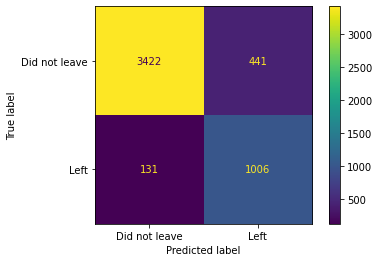

In [ ]:
## Confusion matrix
plot_confusion_matrix(clf_xgb, X_encoded,y, values_format = 'd',
                      display_labels=["Did not leave", "Left"])